In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

100%|██████████| 21.5M/21.5M [00:00<00:00, 76.9MB/s]



0: 384x640 1 car, 974.4ms
Speed: 20.1ms preprocess, 974.4ms inference, 33.1ms postprocess per image at shape (1, 3, 384, 640)
Detected Objects:
Class: car, Confidence: 0.93, Bounding Box: (312.7220153808594, 449.167236328125, 1546.2672119140625, 811.7788696289062)


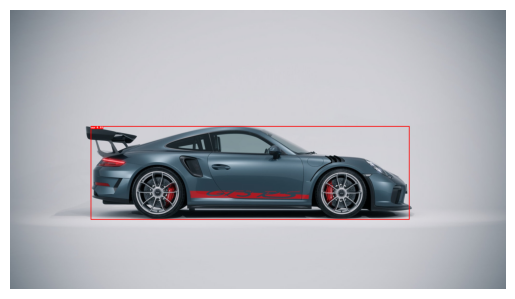

In [3]:
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


model = YOLO('yolov8s.pt')

def detect_and_recognize_objects(image_path):
    img = Image.open(image_path)

    results = model(img)

    draw = ImageDraw.Draw(img)

    font = ImageFont.load_default()

    print("Detected Objects:")
    for result in results:
        for box in result.boxes:
            x_min, y_min, x_max, y_max = box.xyxy[0]
            confidence = box.conf[0].item()
            class_id = box.cls[0].item()
            class_name = model.names[int(class_id)]

            draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=3)

            label = f"{class_name} {confidence:.2f}"
            bbox = draw.textbbox((x_min, y_min), label, font=font)
            draw.rectangle(bbox, fill="red")
            draw.text((x_min, y_min), label, fill="white", font=font)

            print(f"Class: {class_name}, Confidence: {confidence:.2f}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

    plt.imshow(img)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = "/content/5.jpg"
    detect_and_recognize_objects(image_path)
